In [5]:
#Import modul yang digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from google.colab import files
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from matplotlib import pyplot
from IPython.display import display
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.api as sm
from google.colab import files
from sklearn.utils import resample
import math


In [6]:
# Upload Dataset
uploaded = files.upload()

for nama_file in uploaded:
    data = pd.read_csv(nama_file)
    print(f"File {nama_file} berhasil diunggah dan diproses")

# Menentukan kolom-kolom yang digunakan untuk mengecek duplikat
kolom_duplikat = ['R101N', 'R102N', 'R103N', 'R104N']

# Mengubah isi kolom menjadi huruf kecil
data[kolom_duplikat] = data[kolom_duplikat].apply(lambda x: x.str.lower())

# Menghitung jumlah total data yang duplikat berdasarkan kolom tertentu
total_duplikat = data.duplicated(subset=kolom_duplikat).sum()
if total_duplikat > 0:
    print(f"Total data yang duplikat berdasarkan kolom {kolom_duplikat}: {total_duplikat}")
    print("Data yang duplikat:")
    print(data[data.duplicated(subset=kolom_duplikat)])
else:
    print(f"Tidak ada data yang duplikat berdasarkan kolom {kolom_duplikat}.")


Saving 300acak.csv to 300acak (1).csv
File 300acak (1).csv berhasil diunggah dan diproses
Tidak ada data yang duplikat berdasarkan kolom ['R101N', 'R102N', 'R103N', 'R104N'].


In [7]:
# Mengecek Missing Value
print("Mengecek Missing Value:")
print(data.isnull().sum())
print(data.isnull().sum().sum())

Mengecek Missing Value:
R101N       0
R102N       0
R103N       0
R104N       0
Target      0
R809A       0
R809B       0
R809C       0
R809D       0
R809E       0
R809F       0
R1205A1     0
R1205A2     0
R1205A3     0
R1206A1     0
R1206A2     0
R1206A3     0
R1206A4     0
R1007C      0
R1001C1     0
R1001A      0
R1007A      0
R1003B      0
R1004       0
R1005C      0
R1006B      0
R1401A     36
R1401C     36
R501C       0
R502A       0
R604A       0
R604B       0
R808A       0
R808B       0
dtype: int64
72


In [8]:
# Mendapatkan nilai modus dari kolom 'R1401A'
modus_kolom_R1401A = int(data['R1401A'].mode()[0])

# Mendapatkan nilai modus dari kolom 'R1401C'
modus_kolom_R1401C = int(data['R1401C'].mode()[0])

# Mengisi nilai yang kosong pada kolom 'R1401A' dengan nilai modus
data['R1401A'] = data['R1401A'].fillna(modus_kolom_R1401A)

# Mengisi nilai yang kosong pada kolom 'R1401C' dengan nilai modus
data['R1401C'] = data['R1401C'].fillna(modus_kolom_R1401C)

print(data.head())

              R101N            R102N          R103N      R104N  Target  R809A  \
0  sulawesi selatan        bulukumba   bonto bahari      a r a       1      1   
1              bali       karangasem          abang      abang       1      7   
2          bengkulu  bengkulu tengah  pondok kelapa  abu sakim       1      1   
3       jawa tengah         magelang       muntilan   adikarto       1      7   
4    sumatera utara        batu bara   medang deras  aek nauli       1      1   

   R809B  R809C  R809D  R809E  ...  R1005C  R1006B  R1401A  R1401C  R501C  \
0      1      1      1      0  ...       2       1     1.0     1.0      3   
1      1     14      5      3  ...       1       1     1.0     1.0      3   
2      1      1      7      0  ...       2       4     1.0     1.0      3   
3      7      0      6      1  ...       1       1     1.0     1.0      3   
4      1      0     10      0  ...       2       1     3.0     3.0      3   

   R502A  R604A  R604B  R808A  R808B  
0      2   

In [9]:
# Mengecek Missing Value
print("Mengecek Missing Value:")
print(data.isnull().sum())
print(data.isnull().sum().sum())

Mengecek Missing Value:
R101N      0
R102N      0
R103N      0
R104N      0
Target     0
R809A      0
R809B      0
R809C      0
R809D      0
R809E      0
R809F      0
R1205A1    0
R1205A2    0
R1205A3    0
R1206A1    0
R1206A2    0
R1206A3    0
R1206A4    0
R1007C     0
R1001C1    0
R1001A     0
R1007A     0
R1003B     0
R1004      0
R1005C     0
R1006B     0
R1401A     0
R1401C     0
R501C      0
R502A      0
R604A      0
R604B      0
R808A      0
R808B      0
dtype: int64
0


In [10]:
# Menentukan kolom yang akan dinormalisasi
kolom_normalize = data.columns[5:34]

# Melakukan Min-Max Normalization pada kolom tertentu
data[kolom_normalize] = (data[kolom_normalize] - data[kolom_normalize].min()) / (
    data[kolom_normalize].max() - data[kolom_normalize].min()
)

# Menampilkan hasil normalisasi
print(data.head())

              R101N            R102N          R103N      R104N  Target  \
0  sulawesi selatan        bulukumba   bonto bahari      a r a       1   
1              bali       karangasem          abang      abang       1   
2          bengkulu  bengkulu tengah  pondok kelapa  abu sakim       1   
3       jawa tengah         magelang       muntilan   adikarto       1   
4    sumatera utara        batu bara   medang deras  aek nauli       1   

      R809A     R809B     R809C     R809D     R809E  ...    R1005C  R1006B  \
0  0.013333  0.016667  0.027778  0.017857  0.000000  ...  0.333333     0.0   
1  0.093333  0.016667  0.388889  0.089286  0.214286  ...  0.000000     0.0   
2  0.013333  0.016667  0.027778  0.125000  0.000000  ...  0.333333     1.0   
3  0.093333  0.116667  0.000000  0.107143  0.071429  ...  0.000000     0.0   
4  0.013333  0.016667  0.000000  0.178571  0.000000  ...  0.333333     0.0   

   R1401A  R1401C  R501C  R502A  R604A  R604B  R808A  R808B  
0     0.0     0.0    1.0

In [11]:
# Memilih variabel dependen dari kolom 5 hingga 34
x = data.iloc[:, 5:34]

# Memilih variabel independen
y = data[['Target']]

In [12]:
# Gunakan StratifiedKFold sebagai objek cv
random_state = 42
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

# Fungsi untuk menampilkan pembagian data train dan data test
def display_split_indices(cv, x, y):
    for train_idx, test_idx in cv.split(x, y):
        print("Data Train:", len(train_idx), "Data Test:", len(test_idx))

display_split_indices(cv, x, y)

Data Train: 1485 Data Test: 165
Data Train: 1485 Data Test: 165
Data Train: 1485 Data Test: 165
Data Train: 1485 Data Test: 165
Data Train: 1485 Data Test: 165
Data Train: 1485 Data Test: 165
Data Train: 1485 Data Test: 165
Data Train: 1485 Data Test: 165
Data Train: 1485 Data Test: 165
Data Train: 1485 Data Test: 165


In [13]:
# Pembagian Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=random_state)

# Menampilkan bentuk dataset
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1485, 29), (165, 29), (1485, 1), (165, 1))

In [17]:
y_train = y_train.values.ravel()

# RANDOM FOREST
# Inisialisasi model RandomForestClassifier dengan parameter tertentu
rf = RandomForestClassifier(random_state=random_state)

# Inisialisasi GridSearchCV
grid_space = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['entropy', 'gini'],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(rf, param_grid=grid_space, cv=10, scoring='accuracy')
model_grid = grid.fit(x_train, y_train)

# Grid search results
print('Best grid search hyperparameters are: ' + str(model_grid.best_params_))
print('Best grid search score is: ' + str(model_grid.best_score_))

# Inisialisasi model RandomForestClassifier dengan parameter terbaik
rf_best = model_grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2700 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best grid search hyperparameters are: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best grid search score is: 0.8316615272991112


In [18]:
# Menggunakan model terbaik untuk prediksi
y_pred = rf_best.predict(x_test)

# Menampilkan hasil prediksi
print("Predictions on Testing Data:")
print(y_pred)

# Evaluasi akurasi pada data testing
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Testing Data: {accuracy * 100:.2f}%')

# Menghitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix
print("Confusion Matrix:")
print(cm)

Predictions on Testing Data:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy on Testing Data: 81.82%
Confusion Matrix:
[[  3  30]
 [  0 132]]


In [19]:
# Menghitung presisi
precision = precision_score(y_test, y_pred)

# Menghitung recall
recall = recall_score(y_test, y_pred)

# Menghitung F-Measure
f_measure = f1_score(y_test, y_pred)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menghitung Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# Menampilkan hasil
print("Precision:", precision)
print("Recall:", recall)
print("F-Measure:", f_measure)
print("Specificity:", specificity)

Precision: 0.8148148148148148
Recall: 1.0
F-Measure: 0.8979591836734694
Specificity: 0.09090909090909091


In [20]:
# Mendapatkan estimator dari pohon pertama (indeks 0)
estimator = rf_best.estimators_[0]

# Membuat file dot untuk visualisasi
dot_data = export_graphviz(
    estimator,
    out_file=None,
    feature_names=x.columns,
    class_names=['0', '1'],  # Ganti dengan kelas yang sesuai
    filled=True,
    rounded=True,
    special_characters=True
)

# Membuat objek graph dari file dot
graph = graphviz.Source(dot_data)

# Menyimpan visualisasi ke dalam file PNG atau menampilkannya
graph.render("rf_pohon1", format="png", cleanup=True)

'rf_pohon1.png'

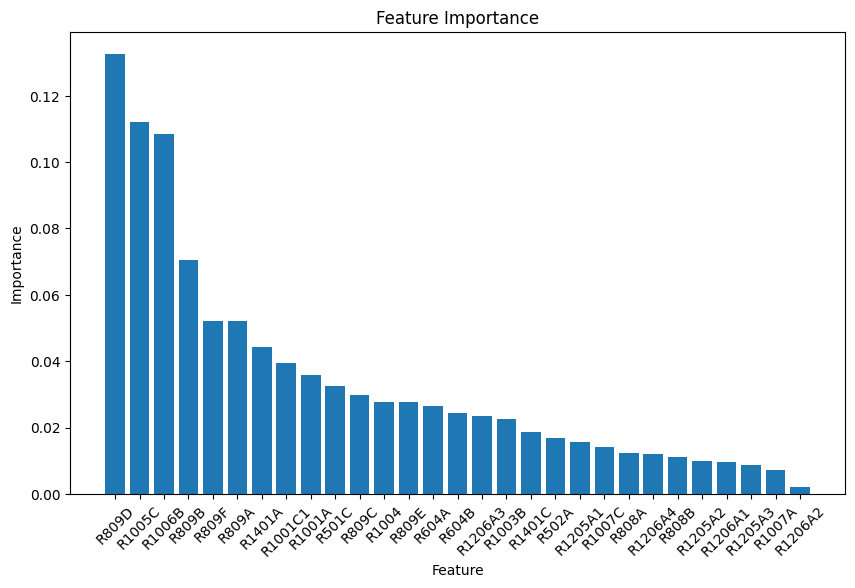

In [21]:
# Menampilkan feature importance
features = x.columns
importances = rf_best.feature_importances_

# Mengurutkan feature importance secara menurun
indices = importances.argsort()[::-1]

# Membuat plot untuk feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), features[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()